created on 11/25/15 (last week at clarapath; exploring word representations for ebay; bay is in taiwan)

a word embedding (aka representation?) maps words to a high-dimensional vector (200-500 dimensions). each feature in this high dimensional vector corresponds to a particular concept. 

similarity between words can be determined by comparing their "concept" composition. "bacon" and "eggs" will be similar as they belong to the same concepts, which may include "breakfast", "food", etc.

reference: colah.github.io/posts/2015-07-NLP-RNNs-Representations

In [210]:
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # works better than the tsne package

% matplotlib inline

# step 1: word embedding model

should consider training model on a much larger corpus.

In [211]:
# load pre-trained word2vec object - this was trained on bloomberg corpus at GA

model = gensim.models.Word2Vec.load('w2v_classifier.pkl') 

In [212]:
# each word is represented by a 100D vector

model['eggs']

array([ 0.01042863, -0.09082334, -0.35011554, -0.14478402, -0.71825773,
       -0.25383466,  0.23865902,  0.13142689,  0.47341087, -0.17986837,
       -0.0372021 ,  0.42531022, -0.13532187,  0.04366703,  0.21852472,
        0.03462471,  0.31207776,  0.00829051,  0.308943  ,  0.25673884,
       -0.06925283,  0.4682849 , -0.00961973,  0.03862087, -0.09179647,
        0.04564424, -0.2339852 , -0.55836165,  0.09667019, -0.31847021,
       -0.0355426 ,  0.0500903 ,  0.17197727, -0.16619124, -0.10991534,
       -0.07830014,  0.15003049, -0.33407968,  0.32998291, -0.30584821,
        0.26705334, -0.11892033,  0.05644705, -0.38063726, -0.33579496,
       -0.36467284,  0.04336204, -0.4033238 ,  0.16085993, -0.46443275,
       -0.19592211,  0.15941769,  0.24573968, -0.15621814, -0.0417763 ,
       -0.01291056,  0.33073303, -0.00319579,  0.30878255, -0.09785306,
       -0.04232512, -0.17990838, -0.06252955, -0.16155854, -0.44194794,
       -0.25797784, -0.07597887,  0.34166408,  0.10581324,  0.00

In [213]:
# find the most similar words

model.most_similar('eggs')

[(u'egg', 0.7384957075119019),
 (u'yolks', 0.7369005084037781),
 (u'whites', 0.6558560132980347),
 (u'buttermilk', 0.6364924907684326),
 (u'yolk', 0.6352832317352295),
 (u'Beat', 0.6335282325744629),
 (u'beaten', 0.6235525608062744),
 (u'Gradually', 0.617035984992981),
 (u'boiled', 0.6137025952339172),
 (u'frothy', 0.6109724044799805)]

# step 2: generate data

In [214]:
words_class0 = ['health', 'medical', 'provider', 'mental', 'fitness', 'physical', 'care',
                'dental', 'patient', 'provider', 'premiums', 'safety', 'deadly', 'behavior',
               'diseased', 'diagnoses', 'psychological', 'environmental']

In [215]:
words_class1 = ['eggs', 'peaches', 'fish', 'lemonade', 'buttermilk', 'steak', 'burger', 
               'salmon', 'pizza', 'cheese', 'meat', 'coffee', 'apple', 'banana', 'milk',
               'sandwich', 'pancakes', 'bacon', 'chorizo', 'ham', 'patties', 'poached',
               'sriracha', 'yolk', 'pureed', 'scrambled', 'egg']

In [216]:
words = words_class0 + words_class1

In [217]:
y = [0] * len(words_class0) + [1] * len(words_class1)

In [218]:
assert(len(words) == len(y))

In [219]:
# create a dataframe where rows = words; columns = concepts

dataframe = []

for word in words:
    dataframe.append(model[word])
    
dataframe = pd.DataFrame(np.vstack(dataframe))

# step 3: visualization

compress 100D vector into 2D space with tsne for visualization. similar words will cluster together following tsne reduction.

In [220]:
data = TSNE(n_components=2, perplexity=40, learning_rate=100, verbose=1).fit_transform(dataframe)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 45 / 45
[t-SNE] Mean sigma: 2.271162
[t-SNE] Error after 65 iterations with early exaggeration: 8.470215
[t-SNE] Error after 123 iterations: 0.218624


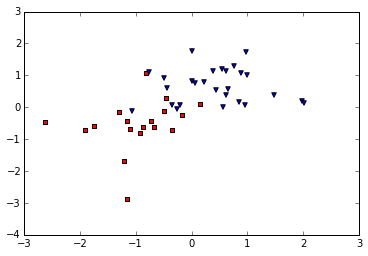

In [221]:
split_pt = len(words_class0) # split points in order to better visualize data

plt.scatter(data[:split_pt, 0], data[:split_pt, 1], c = 'r', marker = 's')
plt.scatter(data[split_pt:, 0], data[split_pt:, 1], c = 'b', marker = 'v')